In [1]:
from templates import *
from templates_latent import *
from experiment import ConditionalModel  # Import the refactored model class
from train_unconditional import ModelTrainer  # Import the refactored model class
import torch
# Optionally visualize in notebook
import matplotlib.pyplot as plt
import torchvision.transforms as T

/home/rg625/mnt/diffae/metrics.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [ ]:
print("Training the autoencoder model...")
gpus = [0]
conf = cifar10_ddpm_130M()
ddpm_model = ModelTrainer(conf)  # Initialize the trainer with the configuration
conf.gpu_ids = gpus

# Initialize model

# Load checkpoint
checkpoint = torch.load(f"checkpoints/{conf.name}/last.ckpt", map_location="cpu")
ddpm_model.model.load_state_dict(checkpoint["model_state_dict"])
ddpm_model.ema_model.load_state_dict(checkpoint["ema_model_state_dict"])

# Set model to evaluation mode
ddpm_model.model.eval()
ddpm_model.ema_model.eval()

Training the autoencoder model...


/tmp/ipykernel_733798/2857241460.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoints/cifar10_ddpm_130M/last.ckpt", map_location="cpu")


BeatGANsUNetModel(
  (time_embed): Sequential(
    (0): Linear(in_features=128, out_features=512, bias=True)
    (1): SiLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
  )
  (input_blocks): ModuleList(
    (0): TimestepEmbedSequential(
      (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1-2): 2 x TimestepEmbedSequential(
      (0): ResBlock(
        (in_layers): Sequential(
          (0): GroupNorm32(32, 128, eps=1e-05, affine=True)
          (1): SiLU()
          (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (h_upd): Identity()
        (x_upd): Identity()
        (out_layers): Sequential(
          (0): GroupNorm32(32, 128, eps=1e-05, affine=True)
          (1): SiLU()
          (2): Dropout(p=0.1, inplace=False)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (skip_connection): Identity()
      )
    )
    (3): TimestepEmbedSequentia

/home/rg625/mnt/diffae/diffusion/base.py:308: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(self.conf.fp16):


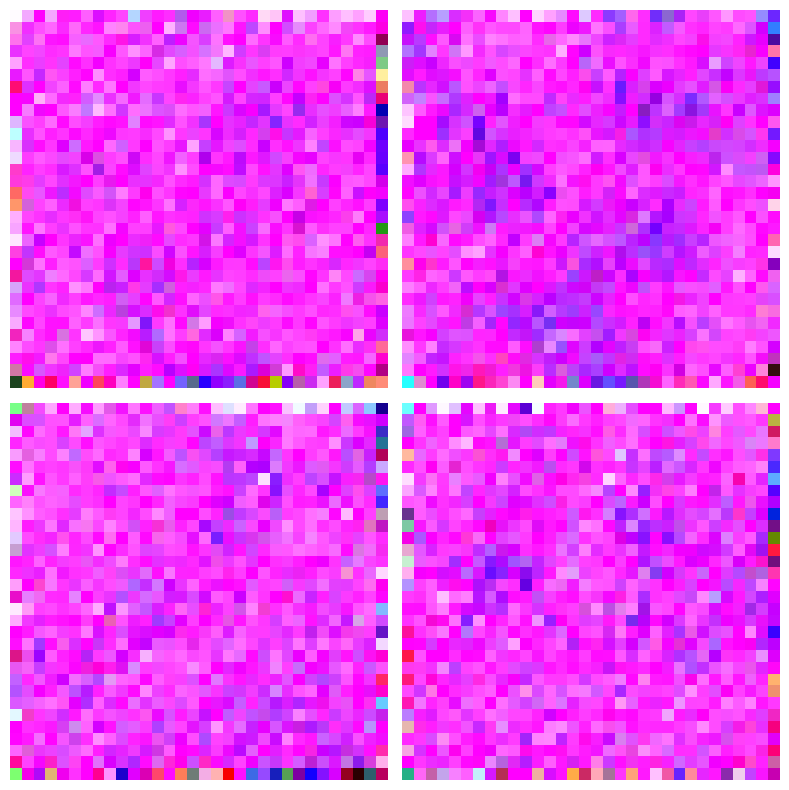

In [ ]:
samples = ddpm_model.sample(num_samples=4)

plt.figure(figsize=(8, 8))
for i, img in enumerate(samples):
    plt.subplot(2, 2, i+1)
    plt.imshow(T.ToPILImage()(img.cpu()))
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
print("Training the autoencoder model...")
gpus = [0]
conf = cifar10_autoenc_130M()  # Make sure this function is defined and returns a TrainConfig
conf.gpu_ids = gpus

# Initialize model
autoenc_model = ConditionalModel(conf)

# Load checkpoint
checkpoint = torch.load(f"checkpoints/{conf.name}/last.ckpt", map_location="cpu")
autoenc_model.model.load_state_dict(checkpoint["model_state_dict"])
autoenc_model.ema_model.load_state_dict(checkpoint["ema_model_state_dict"])

# Set model to evaluation mode
autoenc_model.model.eval()
autoenc_model.ema_model.eval()

Training the autoencoder model...


/home/rg625/mnt/diffae/experiment.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location="cpu")


Loading pretrained weights from checkpoints/cifar10_ddpm_130M/last.ckpt, step: N/A


/tmp/ipykernel_733798/2731740459.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("checkpoints/cifar10_ddpm_130M/checkpoint_epoch_150.pth", map_l

RuntimeError: Error(s) in loading state_dict for BeatGANsAutoencModel:
	Missing key(s) in state_dict: "input_blocks.4.1.norm.weight", "input_blocks.4.1.norm.bias", "input_blocks.4.1.qkv.weight", "input_blocks.4.1.qkv.bias", "input_blocks.4.1.proj_out.weight", "input_blocks.4.1.proj_out.bias", "input_blocks.5.1.norm.weight", "input_blocks.5.1.norm.bias", "input_blocks.5.1.qkv.weight", "input_blocks.5.1.qkv.bias", "input_blocks.5.1.proj_out.weight", "input_blocks.5.1.proj_out.bias", "output_blocks.5.1.in_layers.0.weight", "output_blocks.5.1.in_layers.0.bias", "output_blocks.5.1.in_layers.2.weight", "output_blocks.5.1.in_layers.2.bias", "output_blocks.5.1.out_layers.0.weight", "output_blocks.5.1.out_layers.0.bias", "output_blocks.5.1.out_layers.3.weight", "output_blocks.5.1.out_layers.3.bias", "output_blocks.9.1.norm.weight", "output_blocks.9.1.norm.bias", "output_blocks.9.1.qkv.weight", "output_blocks.9.1.qkv.bias", "output_blocks.9.1.proj_out.weight", "output_blocks.9.1.proj_out.bias", "output_blocks.10.1.norm.weight", "output_blocks.10.1.norm.bias", "output_blocks.10.1.qkv.weight", "output_blocks.10.1.qkv.bias", "output_blocks.10.1.proj_out.weight", "output_blocks.10.1.proj_out.bias", "output_blocks.11.1.norm.weight", "output_blocks.11.1.norm.bias", "output_blocks.11.1.qkv.weight", "output_blocks.11.1.qkv.bias", "output_blocks.11.1.proj_out.weight", "output_blocks.11.1.proj_out.bias", "output_blocks.11.2.in_layers.0.weight", "output_blocks.11.2.in_layers.0.bias", "output_blocks.11.2.in_layers.2.weight", "output_blocks.11.2.in_layers.2.bias", "output_blocks.11.2.out_layers.0.weight", "output_blocks.11.2.out_layers.0.bias", "output_blocks.11.2.out_layers.3.weight", "output_blocks.11.2.out_layers.3.bias", "encoder.input_blocks.4.1.norm.weight", "encoder.input_blocks.4.1.norm.bias", "encoder.input_blocks.4.1.qkv.weight", "encoder.input_blocks.4.1.qkv.bias", "encoder.input_blocks.4.1.proj_out.weight", "encoder.input_blocks.4.1.proj_out.bias", "encoder.input_blocks.5.1.norm.weight", "encoder.input_blocks.5.1.norm.bias", "encoder.input_blocks.5.1.qkv.weight", "encoder.input_blocks.5.1.qkv.bias", "encoder.input_blocks.5.1.proj_out.weight", "encoder.input_blocks.5.1.proj_out.bias". 
	Unexpected key(s) in state_dict: "input_blocks.10.1.norm.weight", "input_blocks.10.1.norm.bias", "input_blocks.10.1.qkv.weight", "input_blocks.10.1.qkv.bias", "input_blocks.10.1.proj_out.weight", "input_blocks.10.1.proj_out.bias", "input_blocks.11.1.norm.weight", "input_blocks.11.1.norm.bias", "input_blocks.11.1.qkv.weight", "input_blocks.11.1.qkv.bias", "input_blocks.11.1.proj_out.weight", "input_blocks.11.1.proj_out.bias", "output_blocks.3.1.norm.weight", "output_blocks.3.1.norm.bias", "output_blocks.3.1.qkv.weight", "output_blocks.3.1.qkv.bias", "output_blocks.3.1.proj_out.weight", "output_blocks.3.1.proj_out.bias", "output_blocks.4.1.norm.weight", "output_blocks.4.1.norm.bias", "output_blocks.4.1.qkv.weight", "output_blocks.4.1.qkv.bias", "output_blocks.4.1.proj_out.weight", "output_blocks.4.1.proj_out.bias", "output_blocks.5.2.in_layers.0.weight", "output_blocks.5.2.in_layers.0.bias", "output_blocks.5.2.in_layers.2.weight", "output_blocks.5.2.in_layers.2.bias", "output_blocks.5.2.out_layers.0.weight", "output_blocks.5.2.out_layers.0.bias", "output_blocks.5.2.out_layers.3.weight", "output_blocks.5.2.out_layers.3.bias", "output_blocks.5.1.norm.weight", "output_blocks.5.1.norm.bias", "output_blocks.5.1.qkv.weight", "output_blocks.5.1.qkv.bias", "output_blocks.5.1.proj_out.weight", "output_blocks.5.1.proj_out.bias", "output_blocks.11.1.in_layers.0.weight", "output_blocks.11.1.in_layers.0.bias", "output_blocks.11.1.in_layers.2.weight", "output_blocks.11.1.in_layers.2.bias", "output_blocks.11.1.out_layers.0.weight", "output_blocks.11.1.out_layers.0.bias", "output_blocks.11.1.out_layers.3.weight", "output_blocks.11.1.out_layers.3.bias", "encoder.input_blocks.10.1.norm.weight", "encoder.input_blocks.10.1.norm.bias", "encoder.input_blocks.10.1.qkv.weight", "encoder.input_blocks.10.1.qkv.bias", "encoder.input_blocks.10.1.proj_out.weight", "encoder.input_blocks.10.1.proj_out.bias", "encoder.input_blocks.11.1.norm.weight", "encoder.input_blocks.11.1.norm.bias", "encoder.input_blocks.11.1.qkv.weight", "encoder.input_blocks.11.1.qkv.bias", "encoder.input_blocks.11.1.proj_out.weight", "encoder.input_blocks.11.1.proj_out.bias". 

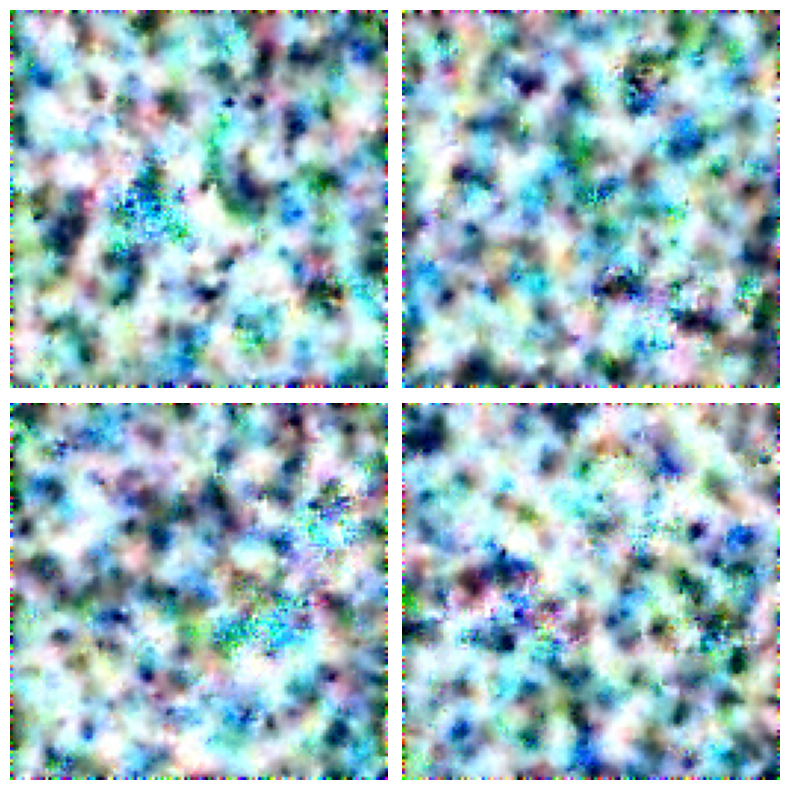

In [5]:
samples = autoenc_model.sample(num_samples=4)

plt.figure(figsize=(8, 8))
for i, img in enumerate(samples):
    plt.subplot(2, 2, i+1)
    plt.imshow(T.ToPILImage()(img.cpu()))
    plt.axis('off')
plt.tight_layout()
plt.show()